# Extracción de datos web

## Índice
1. [Navegador web en Python (socket)](#socket)
2. [Recepción de páginas web con urllib](#urllib)
3. [Parsing de HTML mediante BeatifulSoup](#bea)
4. [Ejemplos de web scraping](#ejemplos)
5. [Web scraping con selenium](#sele)

<a id="socket"></a>
## Navegador web en Python (socket)

Vamos a crear nuestro primer navegador web utilizando el protocolo HTTP, realizando una conexión a un servidor web siguiendo las reglas de este protocolo para solicitar un documento y mostrar lo que el servidor nos devuelve. El documento al que accederemos se encuentra en la página web https://www.w3.org/TR/PNG/iso_8859-1.txt

In [ ]:
import socket

mysock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
mysock.connect(('www.w3.org', 80))
cmd = 'GET https://www.w3.org/TR/PNG/iso_8859-1.txt HTTP/1.0\r\n\r\n'.encode()
mysock.send(cmd)

while True:
    data = mysock.recv(512)
    if len(data) < 1:
        break
    print(data.decode(),end='')

mysock.close()

Primero, el programa realiza una conexión al puerto 80 del servidor www.w3.org. Como nuestro programa está asumiendo el rol de "navegador web", el protocolo HTTP nos dice que tenemos que enviar el comando GET seguido por una línea en blanco. `\r\n` significa un final de línea, y `\r\n\r\n` es el equivalente a la línea en blanco.

<a id="urllib"></a>
## Recepción de páginas web con urllib

Cuando el programa se ejecuta, en su salida sólo vemos el contenido del fichero. Las cabeceras siguen enviándose, pero el código de `urllib` se queda con ella y sólo nos devuelve los datos. Una vez abierta la página web, se puede leer como si fuese un archivo local.  
¿Qué ocurre si cambiamos el txt por otra página web?

<a id="bea"></a>
## Parsing de HTML mediante BeatifulSoup

BeautifulSoup es una librería de Python que permite analizar documentos HTML y extraer datos de ellos, compensando imperfecciones que puedan existir. Para instalar esta librería escribimos en anaconda Prompt:  
`conda install -c anaconda beautifulsoup4`

Esta librería permite, por ejemplo, extraer los atributos href de las etiquetas de anclaje (a)  
<img src='http://www.cellbiol.com/bioinformatics_web_development/wp-content/uploads/2017/01/attributes_and_values_in_the_a_tag.png'>  
En el siguiente ejemplo, vamos a parsear una entrada HTML y extraer los links utilizando la librería BeautifulSoup. 
Utilizaremos urllib para leer la página y después BeautifulSoup para extraer los atributos href de las etiquetas de tipo ancla (a)

Podemos extraer más campos de las etiquetas

Puedes encontrar la documentación de beautifulsoup en https://www.crummy.com/software/BeautifulSoup/bs4/doc/

<a id="ejemplos"></a>
## Ejemplos de web scraping

### 1. Frecuencia de las palabras de un discurso  
Vamos a obtener la frecuencia de las palabras del siguiente discurso: https://elpais.com/internacional/2018/01/31/actualidad/1517387619_036241.html

### 2. Web Scraping de coinbase
Extraemos el valor más reciente de Bitcoin en https://coinmarketcap.com/currencies/bitcoin/
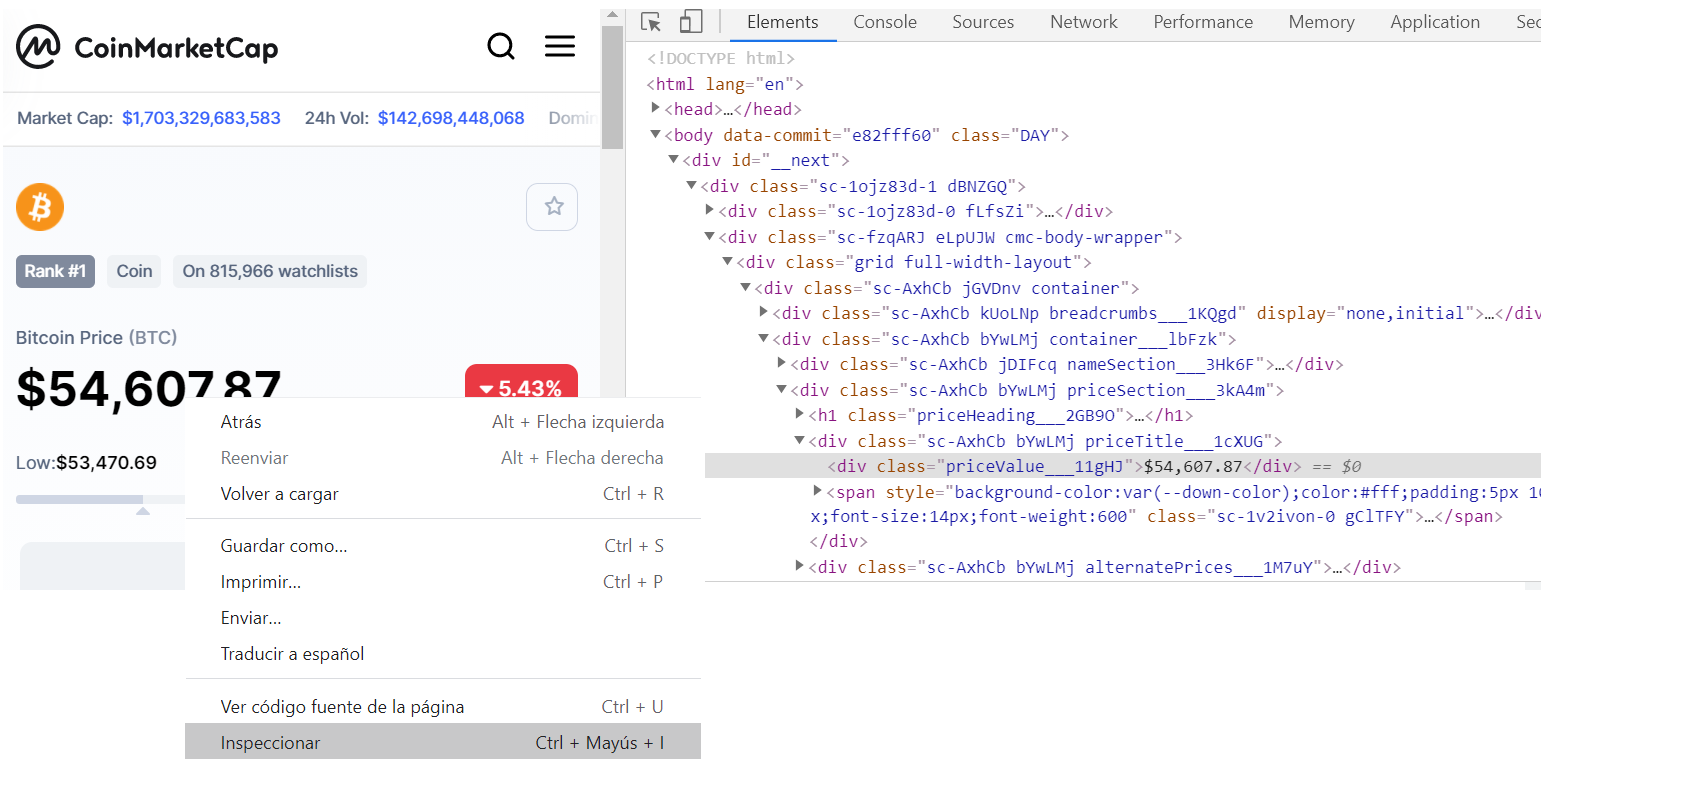

### 3. Web scraping con pandas 

La función `read_html()` de pandas también permite extraer tablas de páginas web, devolviendo una lista de dataframes con todas las tablas que existan.  
Por ejemplo, vamos a hacer scraping de la siguiente tabla: http://www.fdic.gov/bank/individual/failed/banklist.html  

Es necesario instalar la librería `lxml`: `conda install -c conda-forge lxml`

### 4. Agente de usuario

El **agente de usuario** es un identificador con el que un programa inicia sesión en el servidor web para solicitar datos

Cuando un usuario accede a una página web, la aplicación generalmente envía una cadena de texto que identifica al agente de usuario ante el servidor. Este texto forma parte de la petición a través de HTTP, llevando como prefijo
*User-Agent*, y generalmente incluye información como el nombre de la aplicación, la versión, el sistema operativo, y el idioma. 

La identificación de agente de usuario es uno de los criterios de exclusión utilizado para impedir el acceso a ciertas secciones de un sitio web.

Ejemplo: Obtenemos la altura de los futbolistas desde la web de transfermarkt:  
https://www.transfermarkt.es/lionel-messi/profil/spieler/28003


In [ ]:
import urllib.request
from bs4 import BeautifulSoup
url = 'https://www.transfermarkt.es/lionel-messi/profil/spieler/28003'
req = urllib.request.Request(
    url, 
    data=None, 
    headers={
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
    }
)

f = urllib.request.urlopen(req)
soup = BeautifulSoup(f)
tags = soup.find_all(attrs={"itemprop" : "height"})
altura = float(tags[0].contents[0].replace(' m','').replace(',','.'))
altura

## <span style="color:red">Ejemplo</span>

Obtén los equipos que hayan ganado LaLiga en los últimos 10 años con su puntuación a partir de la siguiente URL: https://resultados.as.com/resultados/futbol/primera/2019_2020/clasificacion/  

| Temporada | Club        | Puntos |
|-----------|-------------|--------|
| 19/20     | Real Madrid | 87     |
| 18/19     | Barcelona   | 87     |
| ...       | ...         | ...    |

<a id="sele"></a>
## Web Scraping con Selenium

Selenium es una librería que permite automatizar navegadores web

Es necesario disponer del siguiente driver: http://chromedriver.chromium.org/downloads

Documentación: https://selenium-python.readthedocs.io/

Para instalar la librería, desde anaconda prompt:

`conda install -c conda-forge selenium`  

En este ejemplo vamos a extraer datos climáticos de la web http://eportal.mapa.gob.es/websiar/SeleccionParametrosMap.aspx?dst=1

[Link al Notebook](./Web%20Scraping%20con%20Selenium.ipynb)